In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, classification_report

In [3]:
## MNIST  # uncomment to use MNIST
data_id = 554
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [4]:
## Fashion MNIST  # uncomment to use Fashion MNIST
# data_id = 40996
# class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
#                "Shirt", "Sneaker", "Bag", "AnkleBoot"]

In [5]:
X,y = fetch_openml(data_id=data_id, return_X_y=True, as_frame=False, parser='auto') # will return numpy arrays

In [6]:
# Scale the X's
if X.max() > 1:
    X = X/255
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

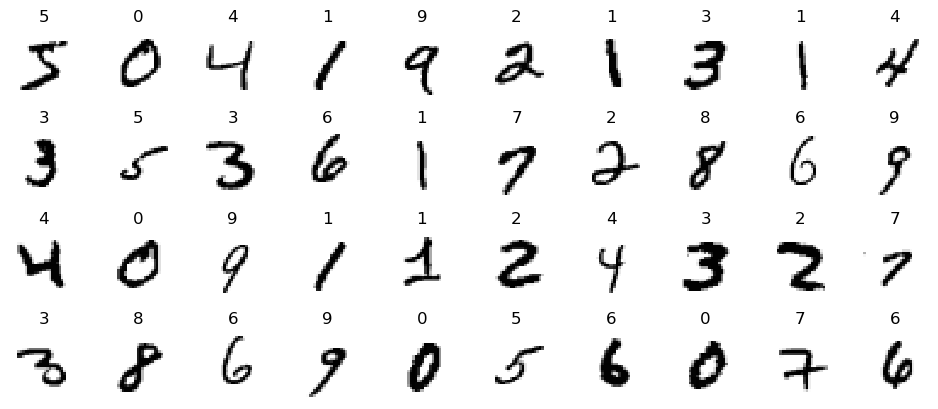

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [9]:
yhat_train = knn.predict(X_train)
yhat = knn.predict(X_test)

In [10]:
print(accuracy_score(y_train, yhat_train))
print(accuracy_score(y_test, yhat))

0.9536333333333333
0.9534


In [11]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.91      1.00      0.95      1135
           2       0.98      0.91      0.95      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.94      0.95       982
           5       0.96      0.95      0.96       892
           6       0.96      0.98      0.97       958
           7       0.95      0.94      0.94      1028
           8       0.99      0.91      0.95       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [12]:
confusion_matrix(y_test, yhat)

array([[ 968,    1,    1,    0,    0,    2,    7,    1,    0,    0],
       [   0, 1130,    2,    1,    0,    0,    2,    0,    0,    0],
       [  22,   28,  942,    7,    2,    0,    4,   20,    7,    0],
       [   0,    4,    2,  971,    1,   13,    1,    9,    5,    4],
       [   0,   18,    0,    0,  920,    0,    9,    2,    1,   32],
       [   3,    8,    0,    9,    1,  850,   12,    2,    0,    7],
       [   9,    5,    0,    0,    3,    2,  939,    0,    0,    0],
       [   0,   38,    3,    0,    2,    0,    0,  965,    0,   20],
       [   9,    6,    4,   17,   10,   15,    6,    8,  890,    9],
       [   8,    7,    3,    9,    7,    2,    1,   13,    0,  959]])

In [13]:
np.round(confusion_matrix(y_test, yhat, normalize='true'),2)

array([[0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.03, 0.91, 0.01, 0.  , 0.  , 0.  , 0.02, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.96, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.02, 0.  , 0.  , 0.94, 0.  , 0.01, 0.  , 0.  , 0.03],
       [0.  , 0.01, 0.  , 0.01, 0.  , 0.95, 0.01, 0.  , 0.  , 0.01],
       [0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.02],
       [0.01, 0.01, 0.  , 0.02, 0.01, 0.02, 0.01, 0.01, 0.91, 0.01],
       [0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.  , 0.01, 0.  , 0.95]])

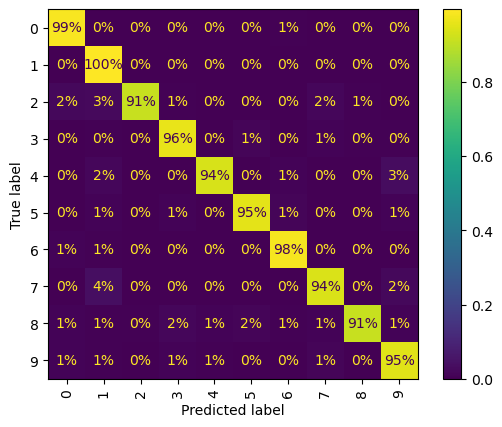

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, yhat,
                                               normalize="true", values_format=".0%",
                                               display_labels=class_names)
plt.xticks(rotation=90)
plt.show()

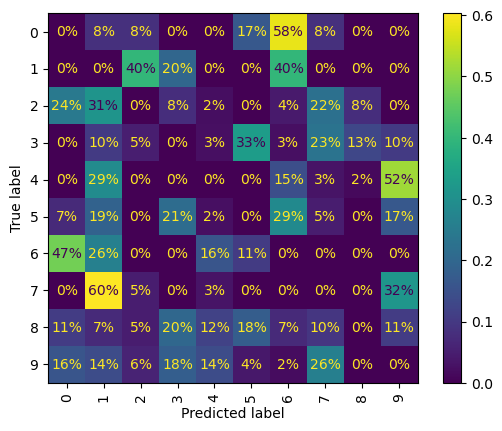

In [15]:
# Set diagonal weights to 0 to better view mistakes
sample_weight = (y_test != yhat)
ConfusionMatrixDisplay.from_predictions(y_test, yhat, sample_weight=sample_weight,
                                               normalize="true", values_format=".0%",
                                               display_labels=class_names)
plt.xticks(rotation=90)
plt.show()

## The interpretation of this confusion matrix is, for example:  
## If a true 0 was misclassified, 58% of the time it was classified as a 6
## (Note: that from the confusion matrix in the previous cell, we know that only 1% of the 
## true 0s were misclassified)

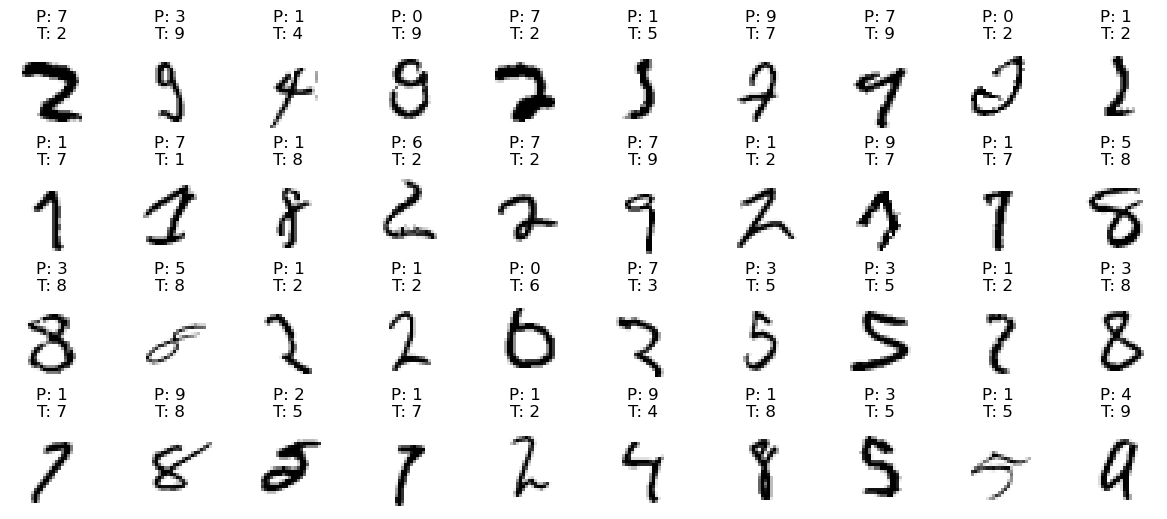

In [16]:
### Look at some misclassified points 

misclassified_indices = np.where(yhat_train != y_train)[0]

n_rows = 4
n_cols = 10
n_plots = n_rows * n_cols


plot_indices = misclassified_indices[:n_plots]

plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))

for i, misclassified_index in enumerate(plot_indices):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X_train[misclassified_index].reshape(28,28), cmap="binary", interpolation="nearest")
    plt.axis('off')
    # Title with predicted (wrong) and true labels
    plt.title(f"P: {class_names[int(yhat_train[misclassified_index])]}\nT: {class_names[int(y_train[misclassified_index])]}")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
